In [3]:
#Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Uploading the excel data-sheet
file_path='Global-Superstore.xlsx'
data = pd.read_excel(file_path)

In [10]:
#Displaying the first row in every columns to understand the data type and column_names(head)
print("Head of the dataset:")
print(data.head(1))

Head of the dataset:
   Row ID        Order ID Order Date  Ship Date Ship Mode Customer ID  \
0   32298  CA-2012-124891 2012-07-31 2012-07-31  Same Day    RH-19495   

  Customer Name   Segment           City     State  ...       Product ID  \
0   Rick Hansen  Consumer  New York City  New York  ...  TEC-AC-10003033   

     Category Sub-Category                                       Product Name  \
0  Technology  Accessories  Plantronics CS510 - Over-the-Head monaural Wir...   

     Sales Quantity Discount    Profit  Shipping Cost  Order Priority  
0  2309.65        7      0.0  762.1845         933.57        Critical  

[1 rows x 24 columns]


In [12]:
#Exploring the data for the number of missing values in each columns
print("\nNumber of missing values in data:")
missing_vals=data.isnull().sum()
print(missing_vals)


Number of missing values in data:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [13]:
#We realise that PostalCode has 41.3k missing values

In [16]:
#Displaying the column datatypes and count to understand how big the dataset is..
print("Info about the dataset:")
print(data.info())

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null

In [18]:
#Using describe function to see the statistics of the numerical columns
print("Descriptive stats:")
print(data.describe())

Descriptive stats:
            Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2013-05-11 21:26:49.155781120   
min        1.00000            2011-01-01 00:00:00   
25%    12823.25000            2012-06-19 00:00:00   
50%    25645.50000            2013-07-08 00:00:00   
75%    38467.75000            2014-05-22 00:00:00   
max    51290.00000            2014-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date   Postal Code         Sales  \
count                          51290   9994.000000  51290.000000   
mean   2013-05-15 20:42:42.745174528  55190.379428    246.490581   
min              2011-01-03 00:00:00   1040.000000      0.444000   
25%              2012-06-23 00:00:00  23223.000000     30.758625   
50%              2013-07-12 00:00:00  56430.500000     85.053000   
75%              2014-05-26 00:00:00  90008.000000    251.053200   
max              2015-01-07

In [19]:
#We can study the range, means(averages) and deviation of various columns like
#Sales,Quantity,Discount,Profit and Shipping cost

In [24]:
#Checking the number of duplicate rows and then dropping them if we have any.
#It only deletes completely same rows and not by columns
dups=data.duplicated().sum()
print(f"No. of duplicates: {dups}")

No. of duplicates: 0


In [25]:
#Since there are no duplicates we dont need to drop anything

In [42]:
# Adding additional date-related columns for further analysis
data['Year']=data['Order Date'].dt.year
data['Month']=data['Order Date'].dt.month
data['Month-Year']=data['Order Date'].dt.to_period('M').astype(str)

In [43]:
print(data.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

                                        Product Name     Sales Quantity  \
0  Plantronics CS

In [44]:
#This is the end of Data Exploration
#Initial Insights:
#23 Columns excluding RowID
#Postal Code had a lot of missing values:41.3k(approx)
#There are total 51290 entries of sales data.
#Mean Sales VALUE: 247(approx) and standard deviation is: 488(approx)
#Mean Quantity VALUE: 3.5(approx) and standard deviation is: 2.4(approx)
#Mean Discount VALUE: 0.14(approx) and standard deviation is: 0.21
#Mean Profit VALUE: 29(approx) and standard deviation is: 174
#Mean Shipping Cost VALUE: 26.38(approx) and standard deviation is: 57.3

Data Insights and Visualization

In [45]:
#Sales and Profit Analysis

In [46]:
#Finding total sales and profit over time(monthly)
sales_prof_monthly=data.groupby('Month-Year')[['Sales','Profit']].sum().reset_index()

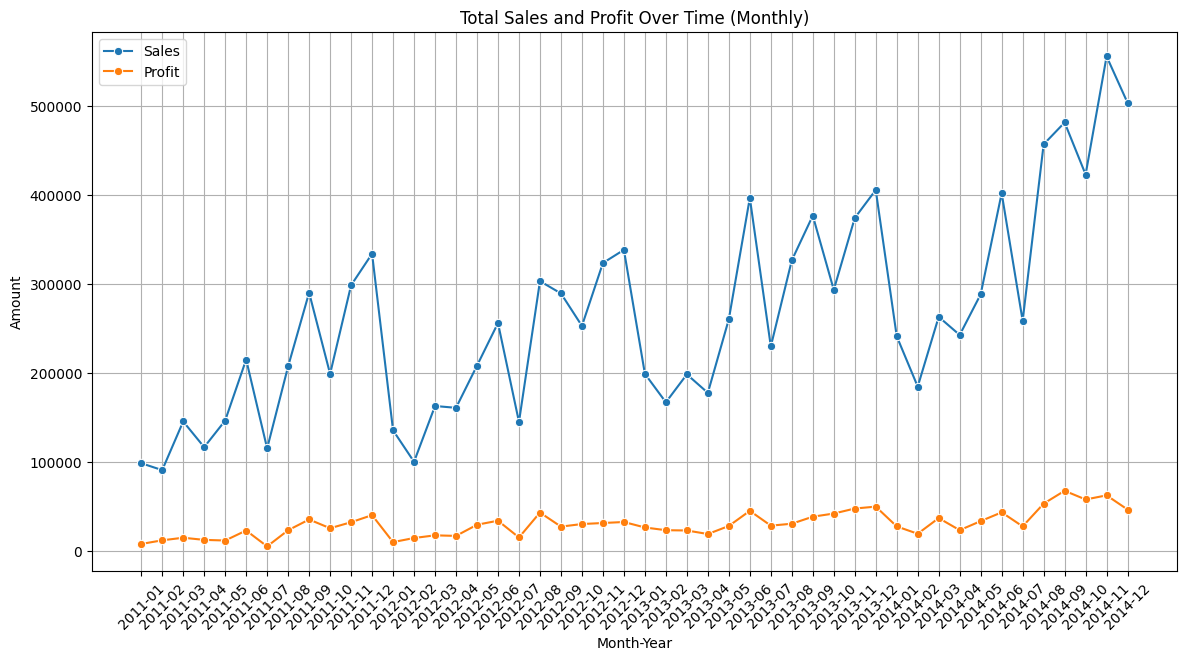

In [47]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month-Year', y='Sales', data=sales_prof_monthly, marker='o', label='Sales')
sns.lineplot(x='Month-Year', y='Profit', data=sales_prof_monthly, marker='o', label='Profit')
plt.title('Total Sales and Profit Over Time (Monthly)')
plt.xlabel('Month-Year')
plt.ylabel('Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

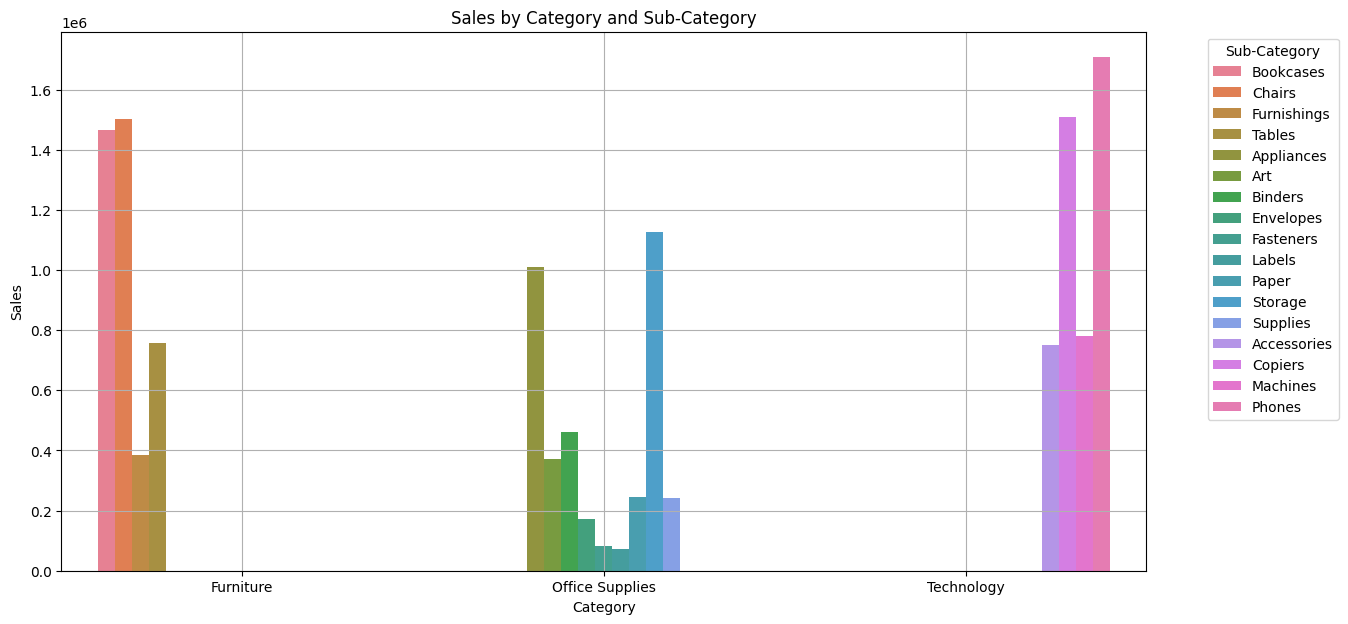

In [48]:
# Sales and profit by category and sub-category
sales_profit_by_category_sub = data.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Category', y='Sales', hue='Sub-Category', data=sales_profit_by_category_sub)
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

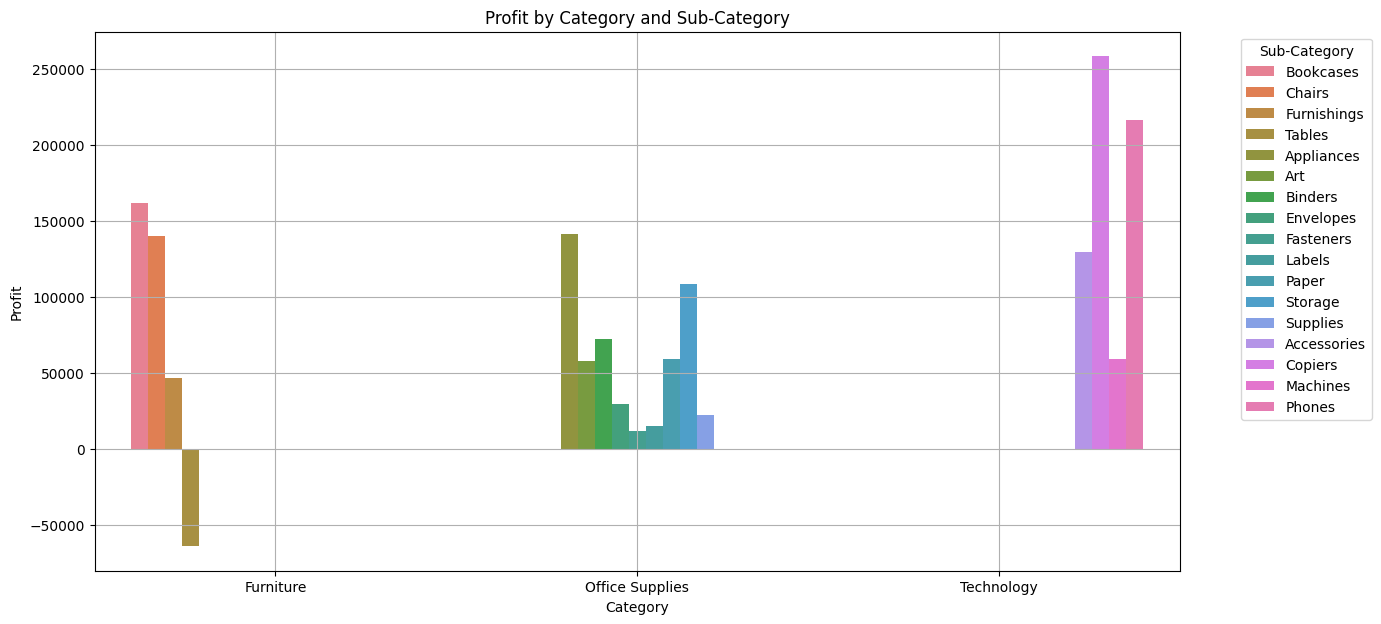

In [49]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Category', y='Profit', hue='Sub-Category', data=sales_profit_by_category_sub)
plt.title('Profit by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [50]:
#Geographical Analysis

In [51]:
#By Region and country
sales_prof_region_country = data.groupby(['Region', 'Country'])[['Sales', 'Profit']].sum().reset_index()

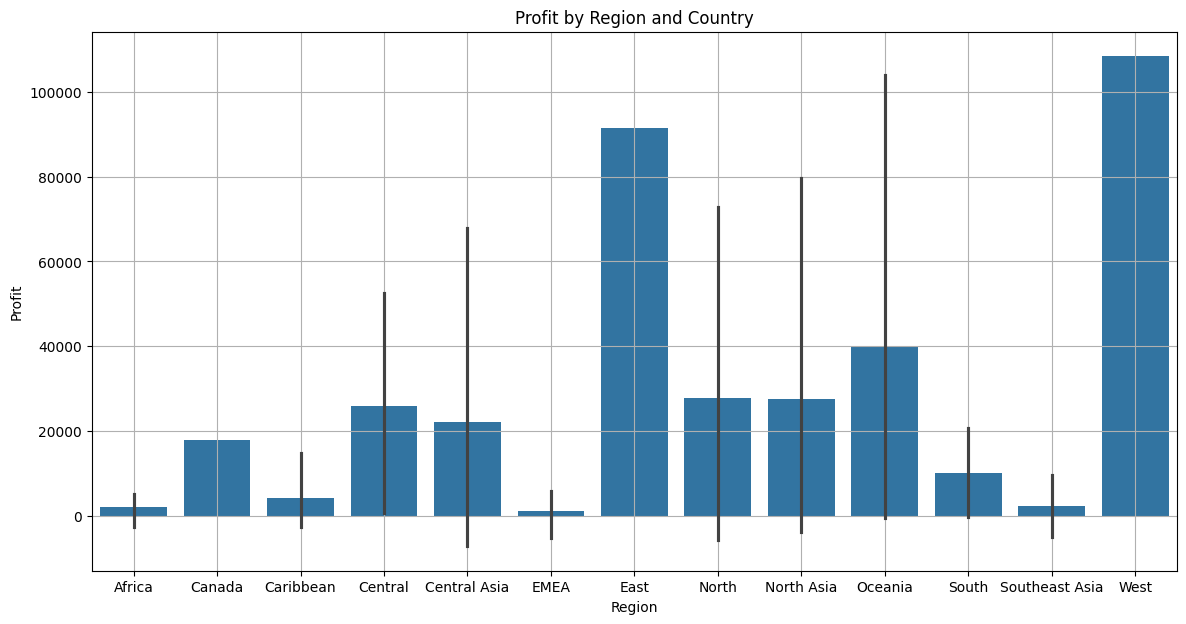

In [66]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Region', y='Profit', data=sales_prof_region_country)
plt.title('Profit by Region and Country')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

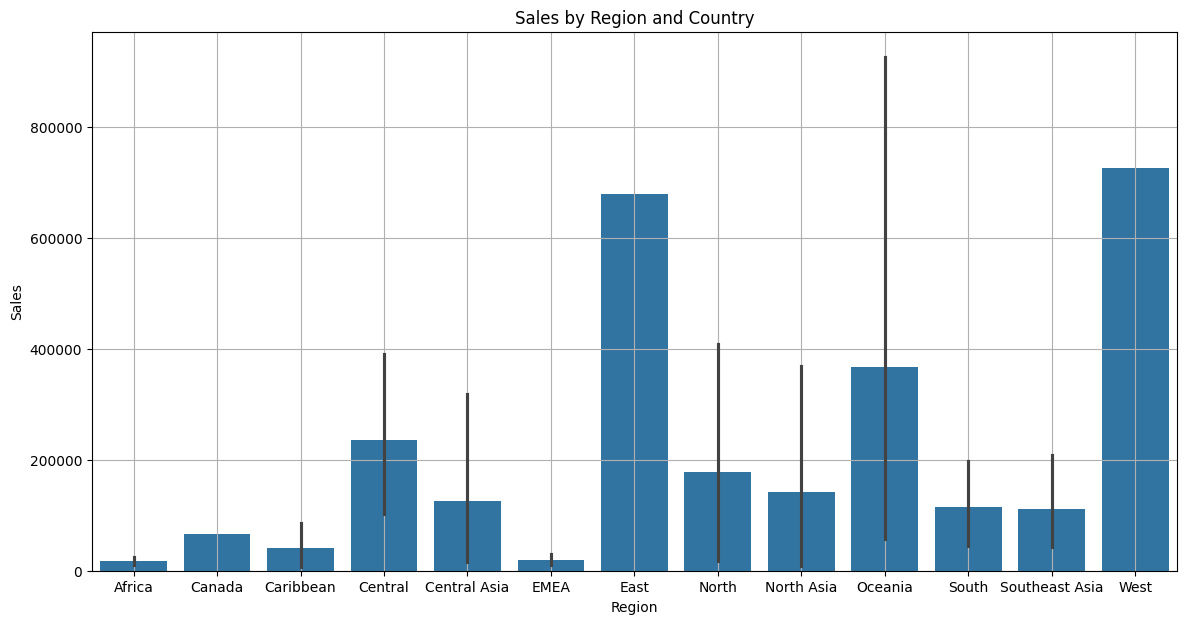

In [96]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Region', y='Sales', data=sales_prof_region_country)
plt.title('Sales by Region and Country')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [70]:
#Customer Analysis

In [71]:
#Top Customers (sales and profit)
top_cust_by_sales = data.groupby('Customer Name')['Sales'].sum().nlargest(10).reset_index()
top_cust_by_profit = data.groupby('Customer Name')['Profit'].sum().nlargest(10).reset_index()

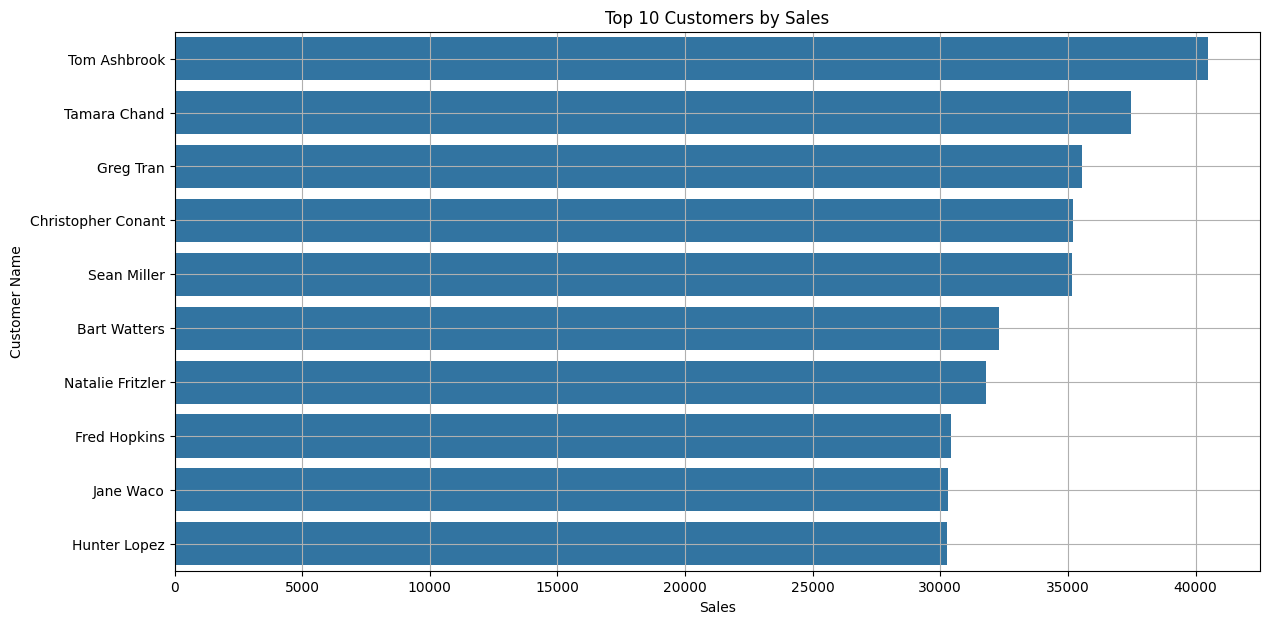

In [97]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Sales', y='Customer Name', data=top_cust_by_sales)
plt.title('Top 10 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer Name')
plt.grid(True)
plt.show()

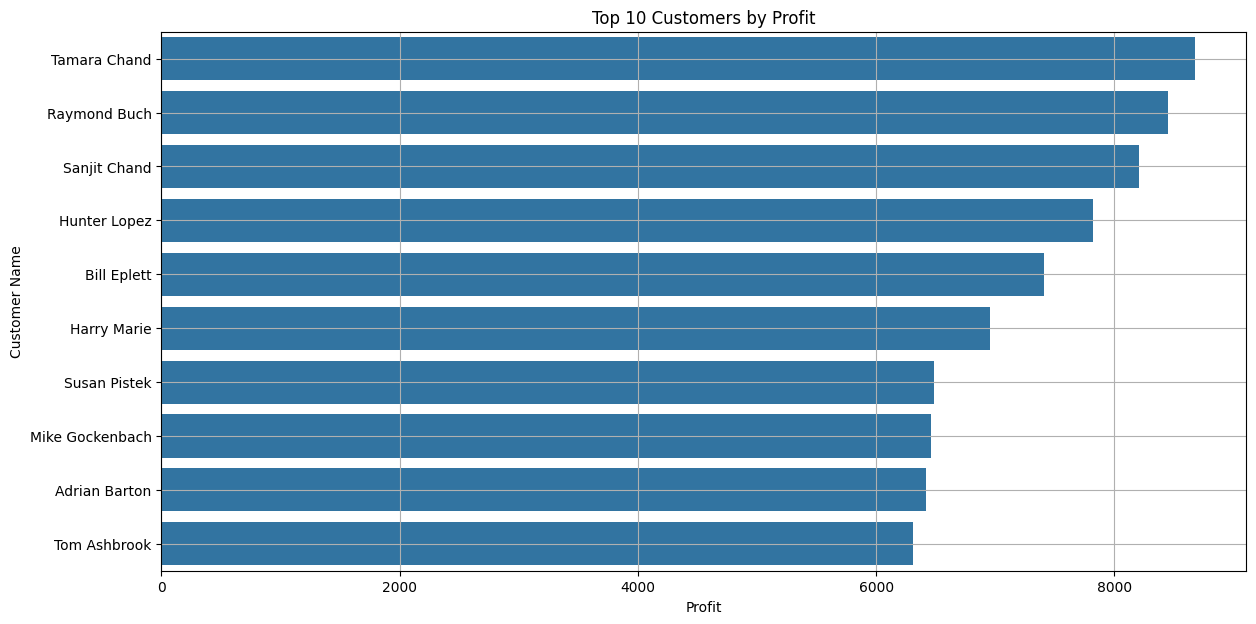

In [98]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Profit', y='Customer Name', data=top_cust_by_profit)
plt.title('Top 10 Customers by Profit')
plt.xlabel('Profit')
plt.ylabel('Customer Name')
plt.grid(True)
plt.show()

In [76]:
#Product Analysis

In [79]:
#Top-Selling products  by Quant.
top_selling_prods_qty=data.groupby('Product Name')['Quantity'].sum().nlargest(10).reset_index()


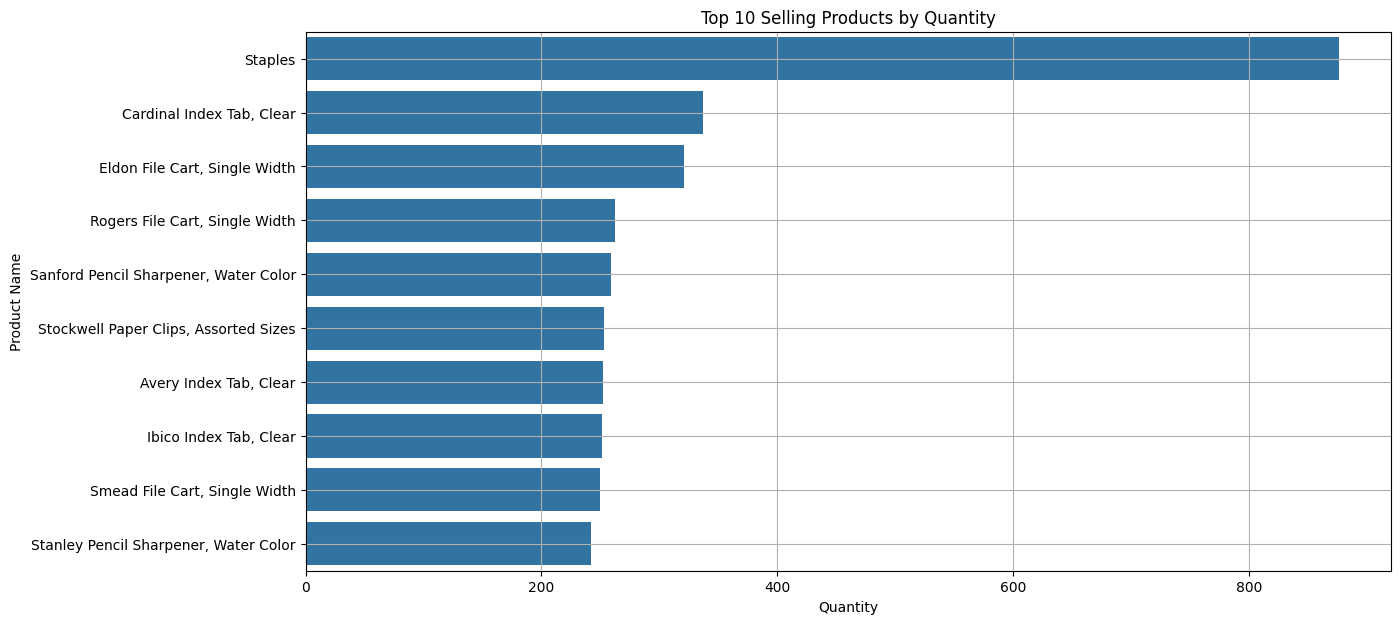

In [99]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Quantity', y='Product Name', data=top_selling_prods_qty)
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Product Name')
plt.grid(True)
plt.show()

In [114]:
#Product performance by category
prod_perf_category=data.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

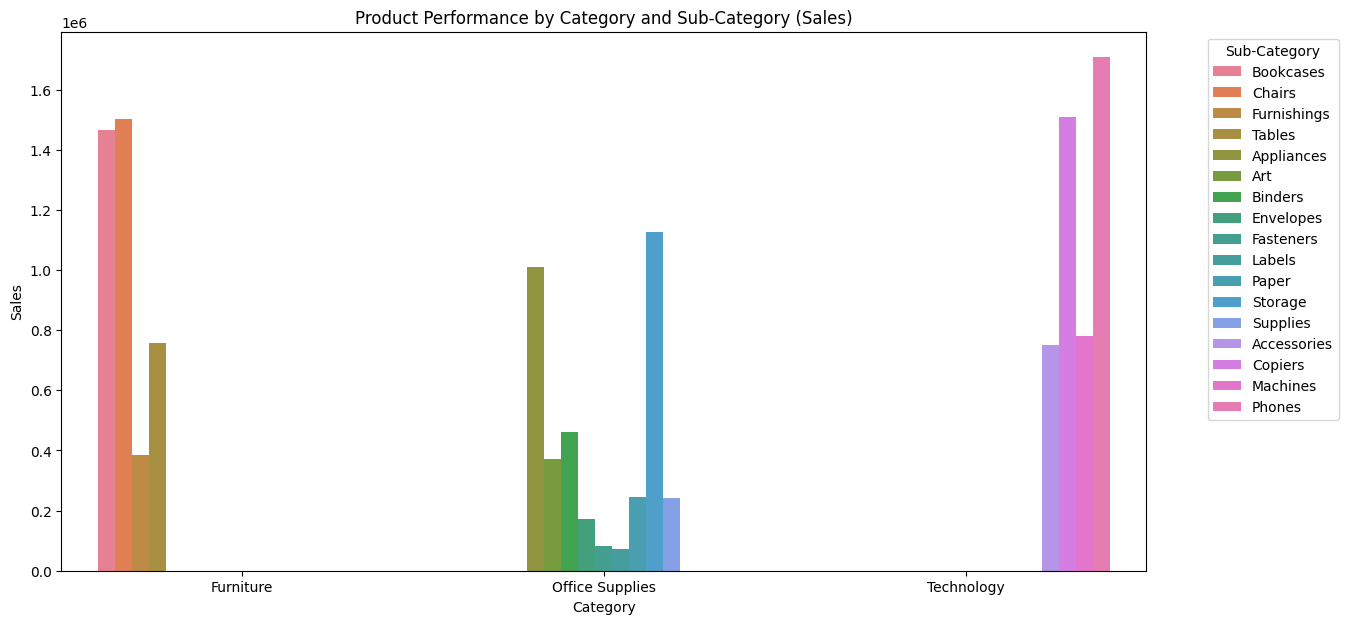

In [115]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Category', y='Sales', hue='Sub-Category', data=prod_perf_category)
plt.title('Product Performance by Category and Sub-Category (Sales)')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()

In [103]:
#Discount Analysis

In [104]:
#Sales and profit by discount
disc_impact=data.groupby('Discount')[['Sales','Profit']].sum().reset_index()

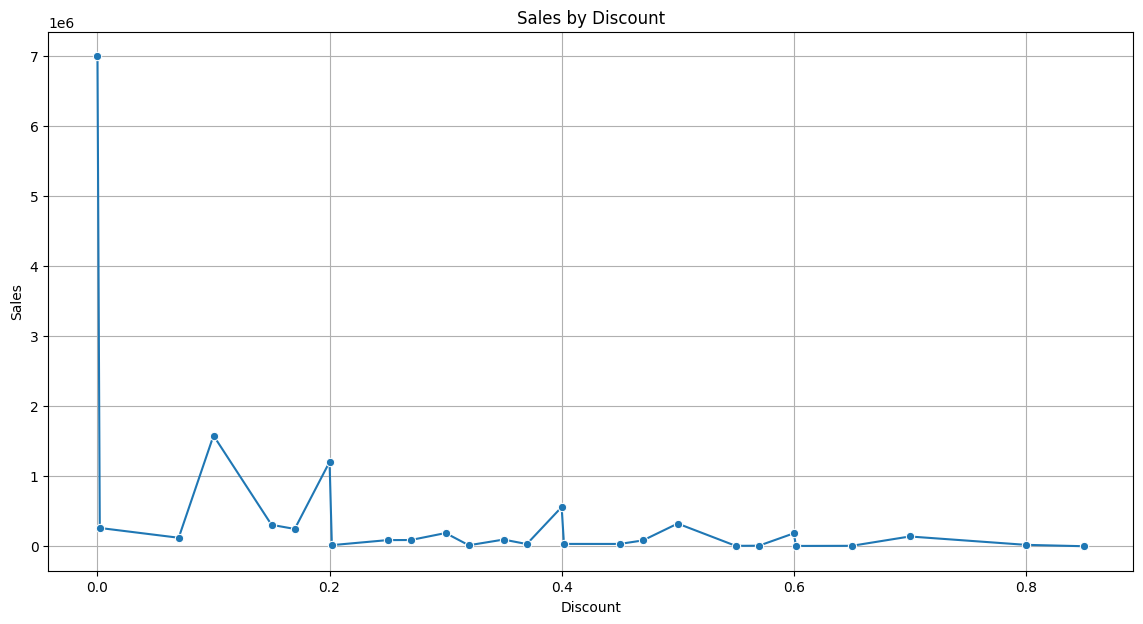

In [106]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Discount', y='Sales', data=disc_impact, marker='o')
plt.title('Sales by Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

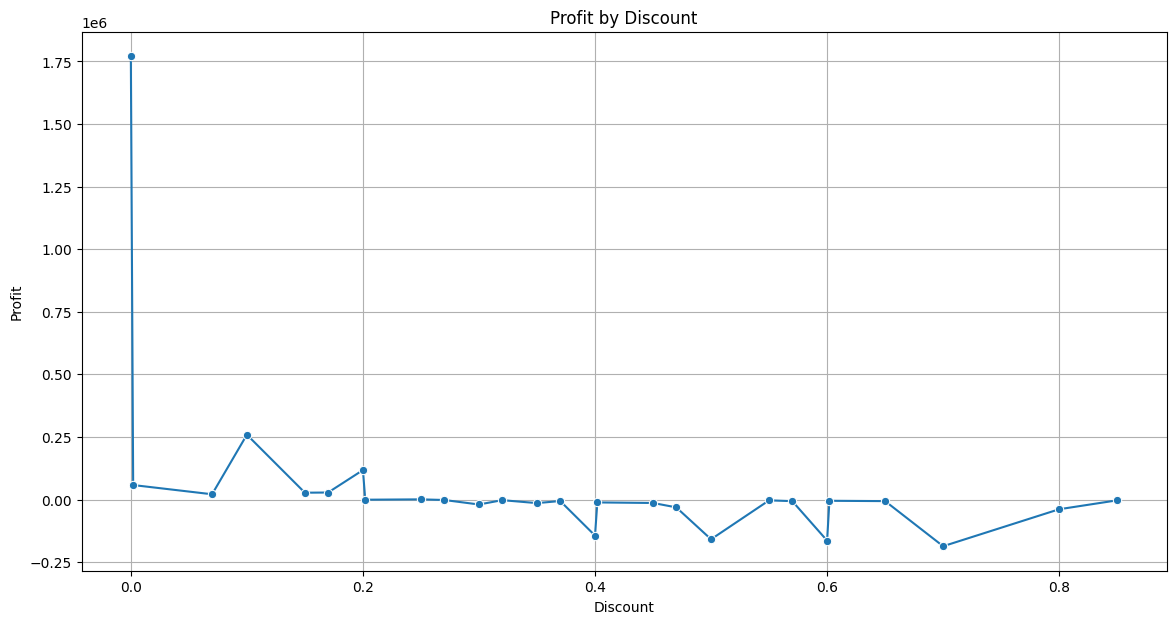

In [108]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Discount', y='Profit', data=disc_impact, marker='o')
plt.title('Profit by Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [109]:
#Shipping Cost Analysis

In [129]:
#Shipping cost by category
ship_cost_by_category= data.groupby(['Category', 'Sub-Category'])['Shipping Cost'].sum().reset_index()

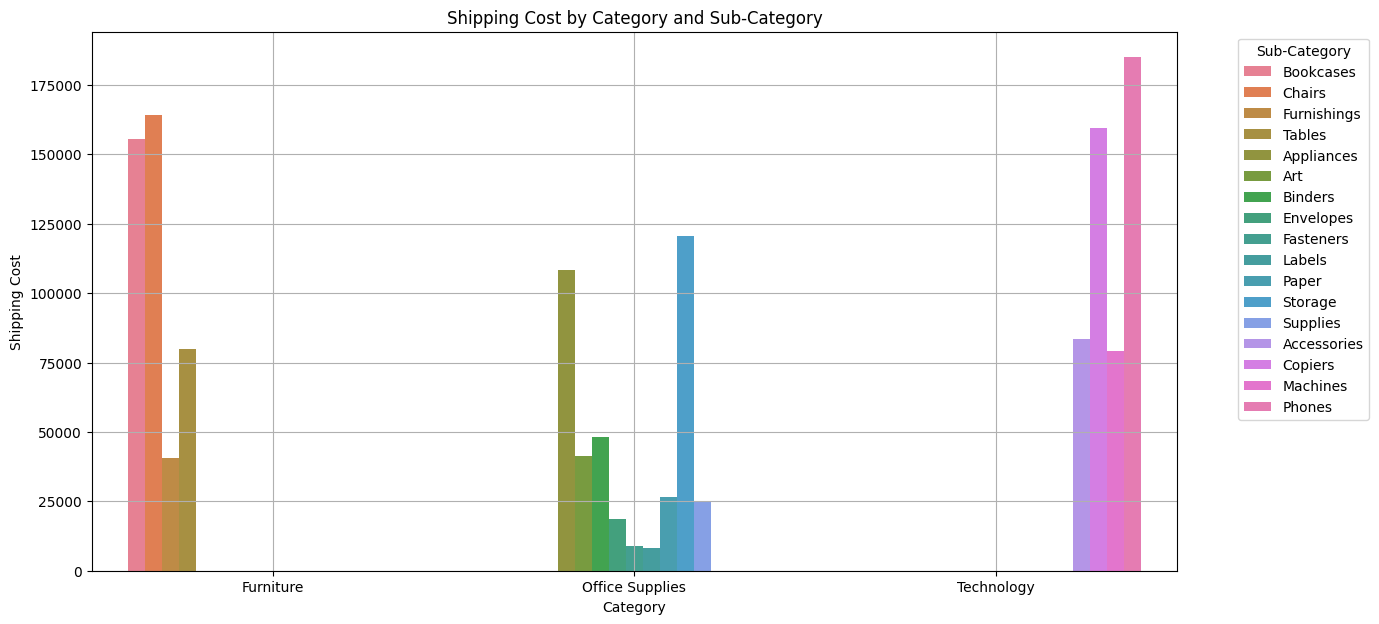

In [130]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Category', y='Shipping Cost', hue='Sub-Category', data=ship_cost_by_category)
plt.title('Shipping Cost by Category and Sub-Category')
plt.xlabel('Category')
plt.ylabel('Shipping Cost')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [131]:
#Order Analysis

In [133]:
#Order Priority Distribution
order_priority_distribution = data['Order Priority'].value_counts().reset_index()
order_priority_distribution.columns = ['Order Priority', 'Count']

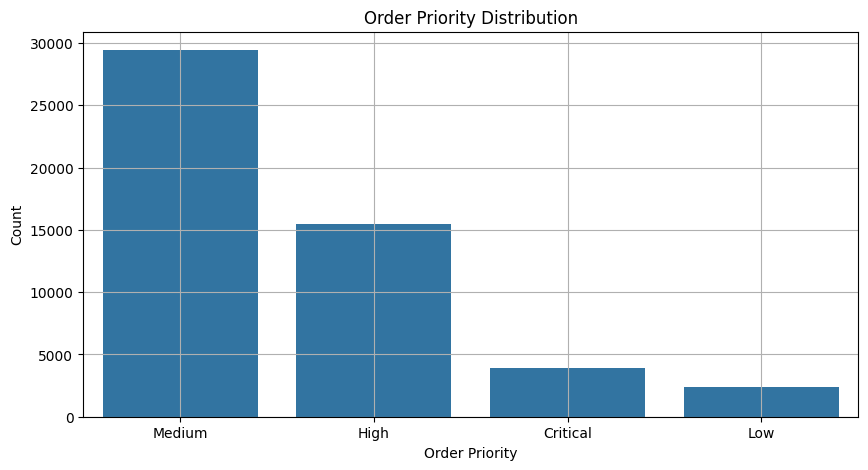

In [134]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Order Priority', y='Count', data=order_priority_distribution)
plt.title('Order Priority Distribution')
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [135]:
#Shipping Mode Analysis

In [136]:
shipping_mode_analysis = data['Ship Mode'].value_counts().reset_index()
shipping_mode_analysis.columns = ['Ship Mode', 'Count']

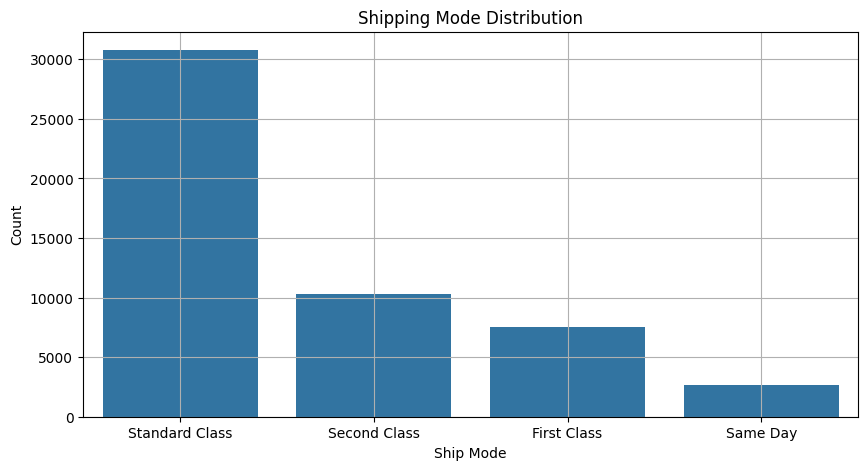

In [137]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Ship Mode', y='Count', data=shipping_mode_analysis)
plt.title('Shipping Mode Distribution')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Correlation Matrix:
                  Sales    Profit  Quantity  Discount  Shipping Cost
Sales          1.000000  0.484918  0.313577 -0.086722       0.768073
Profit         0.484918  1.000000  0.104365 -0.316490       0.354441
Quantity       0.313577  0.104365  1.000000 -0.019875       0.272649
Discount      -0.086722 -0.316490 -0.019875  1.000000      -0.079056
Shipping Cost  0.768073  0.354441  0.272649 -0.079056       1.000000


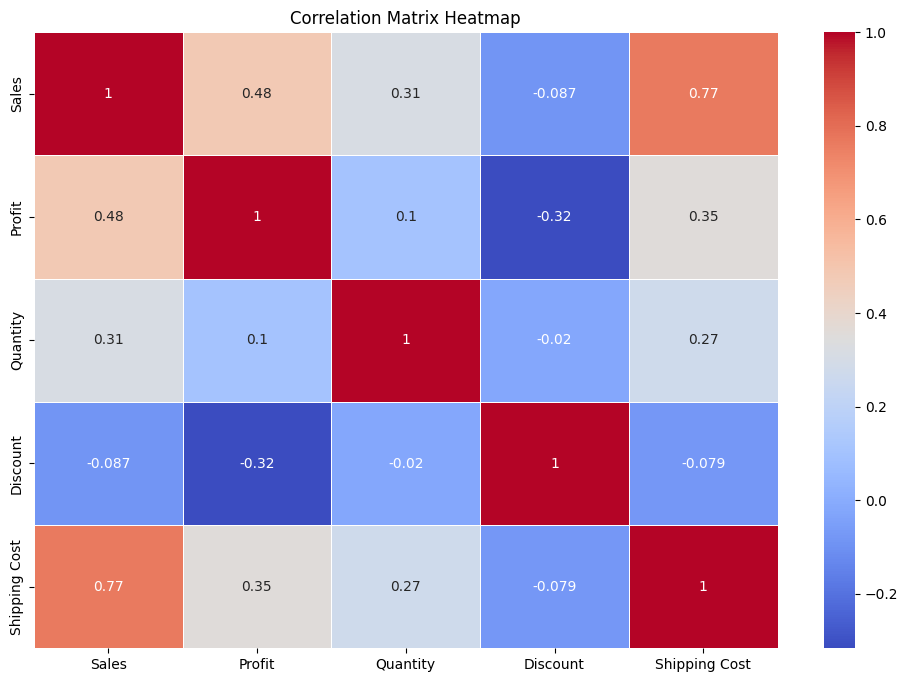

In [138]:
# Correlation Analysis

# Selecting numerical columns for correlation analysis
numerical_cols = ['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Cost']

# Compute correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


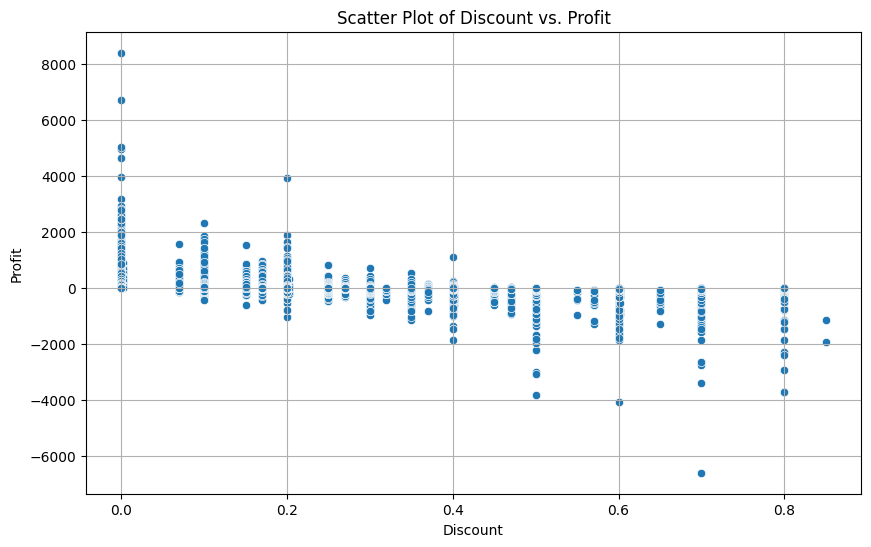

In [139]:
# Checking the relationship between Discount and Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=data)
plt.title('Scatter Plot of Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

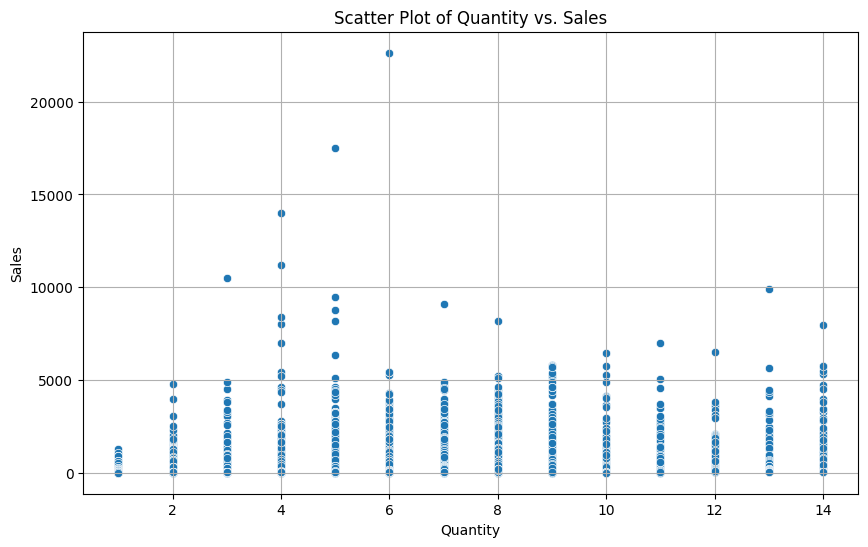

In [140]:
# Checking the relationship between Quantity and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Sales', data=data)
plt.title('Scatter Plot of Quantity vs. Sales')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.grid(True)
plt.show()